In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display as display
import soundfile as sf

In [4]:
# Load the audio file
audio_file = 'audio sample/audio.mp3'
data, rate = librosa.load(audio_file)
data.shape, rate

((213003,), 22050)

In [5]:
ipd.Audio(audio_file, rate=rate)

### Noise-Adding

In [13]:
# Add noise to the audio file
def noise(data, noise_factor=0.02):
    noise = np.random.normal(0, data.std(), data.size)
    return data + noise * noise_factor
ipd.Audio(noise(data, noise_factor=0.25), rate=rate)

In [14]:
sf.write('audio sample/noisy_audio.wav', noise(data, noise_factor=0.25), rate)

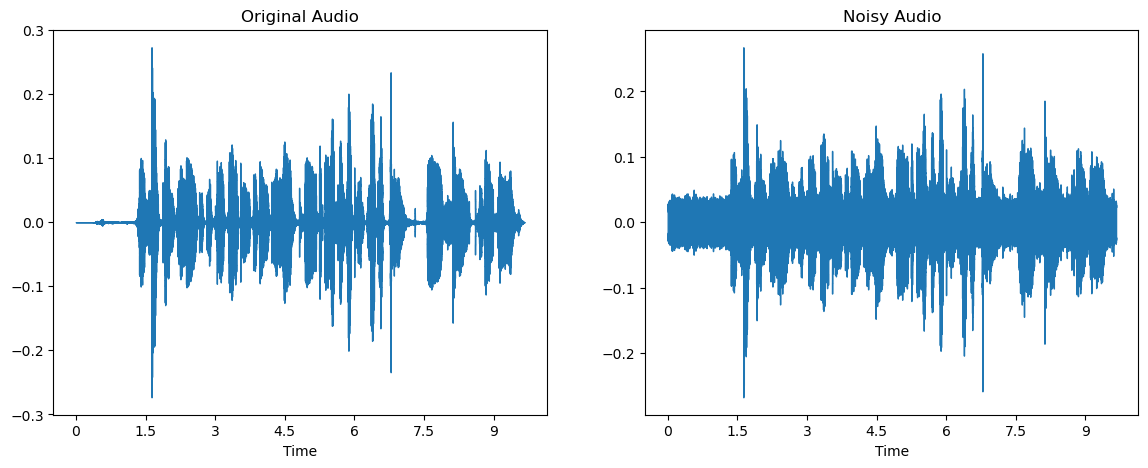

In [19]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
display.waveshow(data, sr=rate)
plt.title('Original Audio')
plt.subplot(1, 2, 2)
display.waveshow(noise(data, noise_factor=0.5), sr=rate)
plt.title('Noisy Audio')
plt.show()

### Time-Stretch

In [25]:
def time_stretch(data, rate=1.5):
    return librosa.effects.time_stretch(data, rate=rate)
ipd.Audio(time_stretch(data, rate=1.8), rate=rate)

In [26]:
# Save the time stretched audio
sf.write('audio sample/time_stretched_audio.wav', time_stretch(data, rate=1.8), rate)

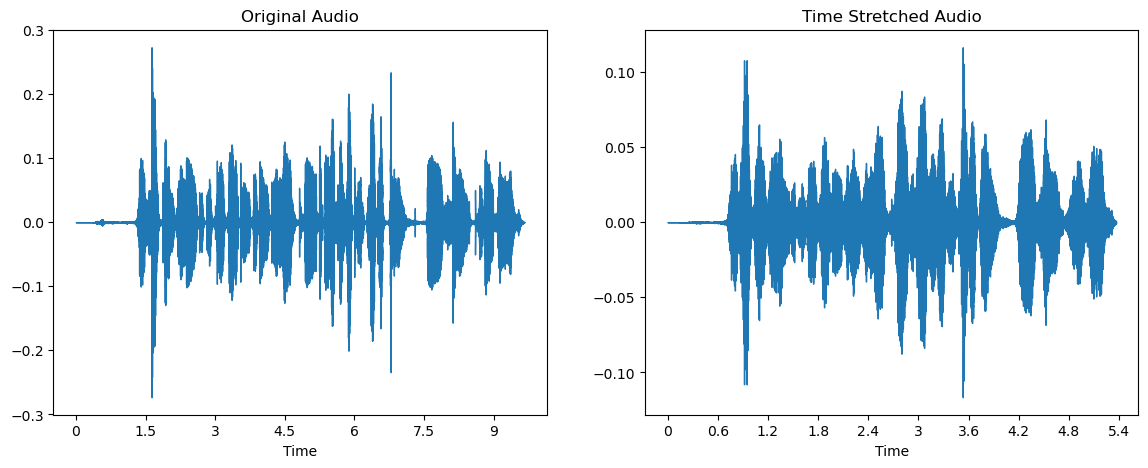

In [27]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
display.waveshow(data, sr=rate)
plt.title('Original Audio')
plt.subplot(1, 2, 2)
display.waveshow(time_stretch(data, rate=1.8), sr=rate)
plt.title('Time Stretched Audio')
plt.show()

### Pitch scale

In [33]:
def pitch_shift(data, rate):
    return librosa.effects.pitch_shift(data, sr=rate, n_steps=2)

In [34]:
ipd.Audio(pitch_shift(data, rate=rate), rate=rate)

In [35]:
# Save the pitch shifted audio
sf.write('audio sample/pitch_shifted_audio.wav', pitch_shift(data, rate=rate), rate)

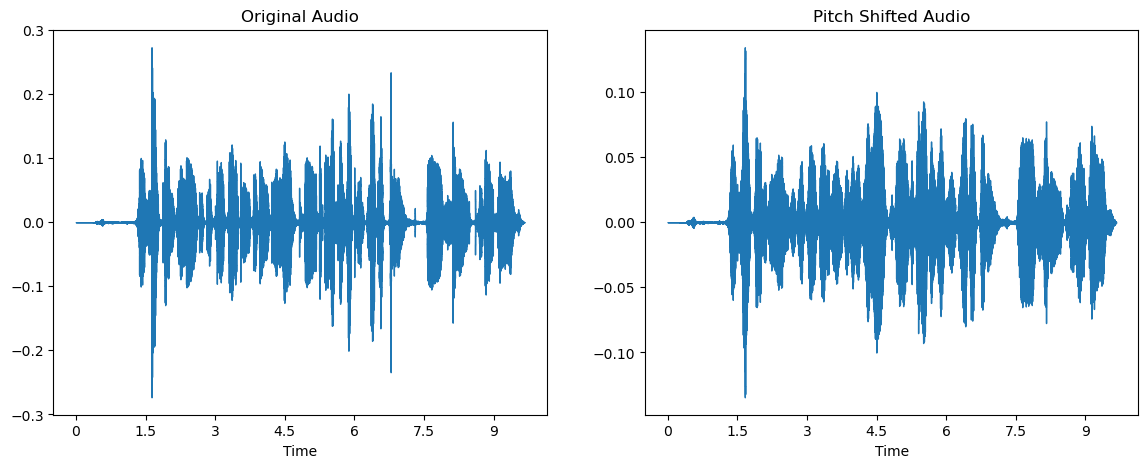

In [36]:
# Plot the original and pitch shifted audio
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
display.waveshow(data, sr=rate)
plt.title('Original Audio')
plt.subplot(1, 2, 2)
display.waveshow(pitch_shift(data, rate=rate), sr=rate)
plt.title('Pitch Shifted Audio')
plt.show()